In [1]:
#Reading data
import numpy as np
import pandas as pd
from scipy import stats
!pip install geopandas
import geopandas as gpd

     |████████████████████████████████| 972kB 4.5MB/s 
     |████████████████████████████████| 6.5MB 18.5MB/s 
     |████████████████████████████████| 14.8MB 335kB/s 


In [2]:
def makeFloats(data):
  for i in range(len(data["Keskmine"])):
    a=data.iloc[i,9]
    if type(a)==str:
      a=a.replace(",",".")
      a=float(a)
      data.iat[i,9]=a

In [3]:
def average(dictionary):
    summary = sum(dictionary.values())
    result = 0
    for i in dictionary:
        result += ((dictionary.get(i)/summary)*i)
    return result,summary

In [4]:
def StatesGraphUpsAndDowns(data1,data2):
  result = Worst(UpsAndDownsStates(data1,data2))
  result = result.append(Best(UpsAndDownsStates(data1,data2)))
  result.sort_values(by="Vahe",ascending=False)
  result.index = np.arange(1, len(result) + 1)
  return result

In [5]:
def GraphUpsAndDowns(data1,data2):
  result = Worst(UpsAndDowns(data1,data2))
  result = result.append(Best(UpsAndDowns(data1,data2)))
  result.sort_values(by="Vahe",ascending=False)
  result.index = np.arange(1, len(result) + 1)
  return result


In [6]:
def find(data,myset):
  uusData = pd.DataFrame(columns = ['Aasta', 'Test', 'Kooli tüüp', 'Õppekeel', 'Maakond',
       'Õppeasutus', 'Sooritajaid', 'Keskmine'])
  i=0
  result=0
  for i in range(len(data)):
    ajutine=data.iloc[i,6]
    if(not(ajutine in myset)):
      myset.append(ajutine)
      dic={}
      for x in range(len(data)):
        if(ajutine==data.iloc[x,6]):
          a=data.iloc[x,9]
          dic[a] = data.iloc[x,8]
      avr = average(dic)
      new_row = {"Aasta":data.iloc[i,0], 'Test':data.iloc[i,1], 'Kooli tüüp':data.iloc[i,3], 'Õppekeel':data.iloc[i,4], 'Maakond':data.iloc[i,5],
       'Õppeasutus':data.iloc[i,6], 'Sooritajaid':avr[1], 'Keskmine':avr[0]}
      uusData=uusData.append(new_row,ignore_index=True)
      result+=1
  return uusData



In [7]:
def BestState(data):
    result = data.sort_values(by="Keskmine",ascending=False)
    result.index = np.arange(1, len(result) + 1)
    return result[["Maakond","Keskmine"]]

In [8]:
def BestSchool(data):
    result = data.sort_values(by="Keskmine",ascending=False).head(10)
    result.index = np.arange(1, len(result) + 1)
    return result[["Õppeasutus","Keskmine"]]

In [9]:
def Best(data):
  result = data.sort_values(by="Vahe").head(10)
  result.index = np.arange(1, len(result) + 1)
  return result

In [10]:
def Worst(data):
  result = data.sort_values(by="Vahe",ascending=False).head(10)
  result.index = np.arange(1, len(result) + 1)
  return result

In [11]:
def NegativesAndPositives(data, string):
  counterNeg = 0
  length = len(data)
  for i in range(len(data)):
    temp = data.iloc[i,11]
    if(temp<0):
      counterNeg+=1
  resultNeg = counterNeg*100/length
  counterPos = length-counterNeg
  resultPos = 100-resultNeg
  print(string + " schools comparsion to last year has grown:",counterPos,"of all",length,"It's:",resultPos,"%")
  print(string + " schools comparsion to last year has decreased:",counterNeg,"of all",length,"It's:",resultNeg,"%")


In [12]:
def NegativesAndPositivesStates(data, string):
  counterNeg = 0
  length = len(data)
  for i in range(len(data)):
    temp = data.iloc[i,8]
    if(temp<0):
      counterNeg+=1
  resultNeg = counterNeg*100/length
  counterPos = length-counterNeg
  resultPos = 100-resultNeg
  print(string + " states comparsion to last year has grown:",counterPos,"of all",length,"It's:",resultPos,"%")
  print(string + " states comparsion to last year has decreased:",counterNeg,"of all",length,"It's:",resultNeg,"%")

In [13]:
def UpsAndDowns(data1,data2):
  uusData = pd.DataFrame(columns = ['Test', 'Kooli tüüp', 'Õppekeel', 'Maakond',
       'Õppeasutus','Aasta1','Sooritajaid1', 'Keskmine1','Aasta2','Sooritajaid2', 'Keskmine2','Vahe'])

  
  for i in range(len(data1["Õppeasutus"])):
    temp1 = data1.iloc[i,5]
    for x in range(len(data2["Õppeasutus"])):
      temp2 = data2.iloc[x,5]
      if(temp1==temp2):
        num1 = data1.iloc[i,7]
        num2 = data2.iloc[x,7]
        diff = num2-num1
        new_row = {'Test':data1.iloc[i,1], 'Kooli tüüp':data1.iloc[i,2], 'Õppekeel':data1.iloc[i,3], 'Maakond':data1.iloc[i,4],'Õppeasutus':data1.iloc[i,5],
                   'Aasta1' :data1.iloc[i,0], 'Sooritajaid1':data1.iloc[i,6], 'Keskmine1':num1,
                   'Aasta2' :data2.iloc[x,0], 'Sooritajaid2':data2.iloc[x,6], 'Keskmine2':num2,'Vahe' : diff}
        uusData=uusData.append(new_row,ignore_index=True)
  return uusData


In [14]:
def UpsAndDownsStates(data1,data2):
  uusData = pd.DataFrame(columns = ['Test', 'Maakond',
       'Aasta1','Sooritajaid1', 'Keskmine1',
       'Aasta2','Sooritajaid2', 'Keskmine2','Vahe'])

  for i in range(len(data1)):
    temp1 = data1.iloc[i,4]
    for x in range(len(data2)):
      temp2 = data2.iloc[x,4]
      if(temp1==temp2):
        num1 = data1.iloc[i,7]
        num2 = data2.iloc[x,7]
        diff = num2-num1
        new_row = {'Test':data1.iloc[i,1], 'Maakond':temp1,
                   'Aasta1' :data1.iloc[i,0], 'Sooritajaid1':data1.iloc[i,3], 'Keskmine1':num1,
                   'Aasta2' :data2.iloc[x,0], 'Sooritajaid2':data2.iloc[x,3], 'Keskmine2':num2,'Vahe' : diff}
        uusData=uusData.append(new_row,ignore_index=True)
  return uusData

In [15]:
def findState(data,myset):
  uusData = pd.DataFrame(columns = ['Aasta', 'Test', 'Kooli tüüp', 'Õppekeel', 'Maakond',
       'Õppeasutus', 'Sooritajaid', 'Keskmine'])
  i=0
  for i in range(len(data)):
    ajutine=data.iloc[i,5]
    if(not(ajutine in myset)):
      myset.append(ajutine)
      dic={}
      for x in range(len(data)):
        if(ajutine==data.iloc[x,5]):
          a=data.iloc[x,9]
          dic[a] = data.iloc[x,8]
      avr = average(dic)
      new_row = {"Aasta":data.iloc[i,0], 'Test':data.iloc[i,1], 'Kooli tüüp':data.iloc[i,3], 'Õppekeel':data.iloc[i,4], 'Maakond':data.iloc[i,5],
       'Õppeasutus':data.iloc[i,6], 'Sooritajaid':avr[1], 'Keskmine':avr[0]}
      uusData=uusData.append(new_row,ignore_index=True)
  return uusData

In [16]:
def map(data, text):
  fp = "maakond_20201201.shp"
  regions = gpd.read_file(fp)
  print(regions.columns)
  state = BestState(data)
  merged = regions.set_index('MNIMI').join(state.set_index('Maakond'))
  merged = merged.reset_index()
  merged = merged.fillna(0)
  merged[['MNIMI', 'Keskmine']]
  merged = merged.plot('Keskmine', linewidth=0.8, edgecolor='0.8', figsize=(30,10), legend=True, legend_kwds={'label': "Average score"})
  merged.set_title(text)

In [17]:
Est2018 = pd.read_csv("Estonian-2018.csv",sep= ";")
Est2018 = Est2018.drop('AUP', axis=1)
Est2018 = Est2018.drop('ÜUP', axis=1)
Est2018 = Est2018.drop("Testi ID",axis=1)
Est2018 = Est2018.drop("Soorituskeel",axis=1)
Est2018 = Est2018.drop("Max võimalik pallide arv",axis=1)
Est2018 = Est2018.drop(Est2018.columns[10:],axis=1)

makeFloats(Est2018)
Est2018_Schools = find(Est2018,[])
Est2018_States = findState(Est2018,[])

In [18]:
Est2019 = pd.read_csv("Estonian-2019.csv",sep= ";")
Est2019 = Est2019.drop('AUP', axis=1)
Est2019 = Est2019.drop('ÜUP', axis=1)
Est2019 = Est2019.drop("Testi ID",axis=1)
Est2019 = Est2019.drop("Soorituskeel",axis=1)
Est2019 = Est2019.drop("Max võimalik pallide arv",axis=1)
Est2019 = Est2019.drop(Est2019.columns[10:],axis=1)

makeFloats(Est2019)
Est2019_Schools = find(Est2019,[])
Est2019_States = findState(Est2019,[])

In [19]:
Est2020 = pd.read_csv("Estonian-2020.csv",sep= ";")
Est2020 = Est2020.drop('AUP', axis=1)
Est2020 = Est2020.drop('ÜUP', axis=1)
Est2020 = Est2020.drop("Testi ID",axis=1)
Est2020 = Est2020.drop("Soorituskeel",axis=1)
Est2020 = Est2020.drop("Max võimalik pallide arv",axis=1)
Est2020 = Est2020.drop(Est2020.columns[10:],axis=1)

makeFloats(Est2020)
Est2020_Schools = find(Est2020,[])
Est2020_States = findState(Est2020,[])

In [20]:
Math2018A = pd.read_csv("Math-advanced-2018.csv",sep= ";")
Math2018A = Math2018A.drop('AUP', axis=1)
Math2018A = Math2018A.drop('ÜUP', axis=1)
Math2018A = Math2018A.drop("Testi ID",axis=1)
Math2018A = Math2018A.drop("Soorituskeel",axis=1)
Math2018A = Math2018A.drop("Max võimalik pallide arv",axis=1)
Math2018A = Math2018A.drop(Math2018A.columns[10:],axis=1)

makeFloats(Math2018A)
Math2018A_Schools = find(Math2018A,[])
Math2018A_States = findState(Math2018A,[])

In [21]:
Math2019A = pd.read_csv("Math-advanced-2019.csv",sep= ";")
Math2019A = Math2019A.drop('AUP', axis=1)
Math2019A = Math2019A.drop('ÜUP', axis=1)
Math2019A = Math2019A.drop("Testi ID",axis=1)
Math2019A = Math2019A.drop("Soorituskeel",axis=1)
Math2019A = Math2019A.drop("Max võimalik pallide arv",axis=1)
Math2019A = Math2019A.drop(Math2019A.columns[10:],axis=1)

makeFloats(Math2019A)
Math2019A_Schools = find(Math2019A,[])
Math2019A_States = findState(Math2019A,[])

In [22]:
Math2020A = pd.read_csv("Math-advanced-2020.csv",sep= ";")
Math2020A = Math2020A.drop('AUP', axis=1)
Math2020A = Math2020A.drop('ÜUP', axis=1)
Math2020A = Math2020A.drop("Testi ID",axis=1)
Math2020A = Math2020A.drop("Soorituskeel",axis=1)
Math2020A = Math2020A.drop("Max võimalik pallide arv",axis=1)
Math2020A = Math2020A.drop(Math2020A.columns[10:],axis=1)

makeFloats(Math2020A)
Math2020A_Schools = find(Math2020A,[])
Math2020A_States = findState(Math2020A,[])

In [23]:
Math2018 = pd.read_csv("Math-simple-2018.csv",sep= ";")
Math2018 = Math2018.drop('AUP', axis=1)
Math2018 = Math2018.drop('ÜUP', axis=1)
Math2018 = Math2018.drop("Testi ID",axis=1)
Math2018 = Math2018.drop("Soorituskeel",axis=1)
Math2018 = Math2018.drop("Max võimalik pallide arv",axis=1)
Math2018 = Math2018.drop(Math2018.columns[10:],axis=1)

makeFloats(Math2018)
Math2018_Schools = find(Math2018,[])
Math2018_States = findState(Math2018,[])

In [24]:
Math2019 = pd.read_csv("Math-simple-2019.csv",sep= ";")
Math2019 = Math2019.drop('AUP', axis=1)
Math2019 = Math2019.drop('ÜUP', axis=1)
Math2019 = Math2019.drop("Testi ID",axis=1)
Math2019 = Math2019.drop("Soorituskeel",axis=1)
Math2019 = Math2019.drop("Max võimalik pallide arv",axis=1)
Math2019 = Math2019.drop(Math2019.columns[10:],axis=1)

makeFloats(Math2019)
Math2019_Schools = find(Math2019,[])
Math2019_States = findState(Math2019,[])

In [25]:
Math2020 = pd.read_csv("Math-simple-2020.csv",sep= ";")
Math2020 = Math2020.drop('AUP', axis=1)
Math2020 = Math2020.drop('ÜUP', axis=1)
Math2020 = Math2020.drop("Testi ID",axis=1)
Math2020 = Math2020.drop("Soorituskeel",axis=1)
Math2020 = Math2020.drop("Max võimalik pallide arv",axis=1)
Math2020 = Math2020.drop(Math2020.columns[10:],axis=1)

makeFloats(Math2020)
Math2020_Schools = find(Math2020,[])
Math2020_States = findState(Math2020,[])

In [26]:

NegativesAndPositives(UpsAndDowns(Est2019_Schools,Est2020_Schools), "Estonian language 2020")
NegativesAndPositivesStates(UpsAndDownsStates(Est2019_States,Est2020_States), "Estonian language 2020")
NegativesAndPositives(UpsAndDowns(Est2018_Schools,Est2019_Schools), "Estonian language 2019")

Estonian language 2020 schools comparsion to last year has grown: 51 of all 125 It's: 40.8 %
Estonian language 2020 schools comparsion to last year has decreased: 74 of all 125 It's: 59.2 %
Estonian language 2020 states comparsion to last year has grown: 5 of all 16 It's: 31.25 %
Estonian language 2020 states comparsion to last year has decreased: 11 of all 16 It's: 68.75 %
Estonian language 2019 schools comparsion to last year has grown: 62 of all 129 It's: 48.06201550387597 %
Estonian language 2019 schools comparsion to last year has decreased: 67 of all 129 It's: 51.93798449612403 %


                             Õppeasutus   Keskmine
1                    Tallinna Reaalkool  81.549091
2             Hugo Treffneri Gümnaasium  81.393143
3      G. Otsa nim Tallinna Muusikakool  80.200000
4              Gustav Adolfi Gümnaasium  78.321277
5              Tallinna Inglise Kolledž  78.248148
6            Tallinna Prantsuse Lütseum  78.247619
7   Pärnu Sütevaka Humanitaargümnaasium  77.338095
8                Miina Härma Gümnaasium  75.472727
9           Tartu Jaan Poska Gümnaasium  73.301351
10          Vanalinna Hariduskolleegium  73.264948
               Maakond   Keskmine
1        Tartu maakond  67.716431
2       Jõgeva maakond  66.003468
3        Harju maakond  63.838733
4        Saare maakond  62.373869
5        Pärnu maakond  62.274486
6         Hiiu maakond  61.425000
7         Võru maakond  60.880769
8        Lääne maakond  60.659119
9        Rapla maakond  59.710778
10       Põlva maakond  59.531250
11  Lääne-Viru maakond  59.136614
12       Valga maakond  58.8140

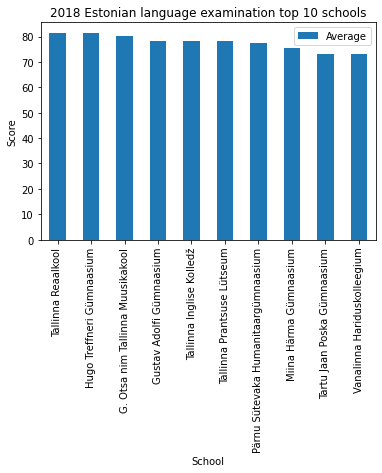

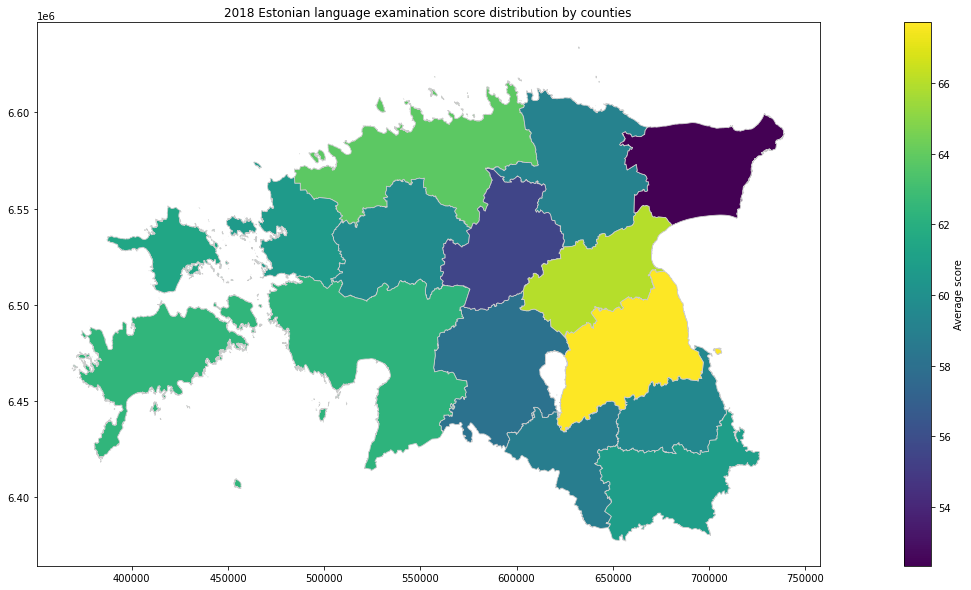

In [27]:
school = BestSchool(Est2018_Schools)
state = BestState(Est2018_States)
print(school)
print(state)

school = school.plot(x ='Õppeasutus', y='Keskmine', kind='bar')
school.set_title("2018 Estonian language examination top 10 schools")
school.set_xlabel("School")
school.set_ylabel("Score")
school.legend(["Average"])

map(state, "2018 Estonian language examination score distribution by counties")

                             Õppeasutus   Keskmine
1             Hugo Treffneri Gümnaasium  83.533149
2   Pärnu Sütevaka Humanitaargümnaasium  83.010345
3            Tallinna Prantsuse Lütseum  82.056140
4                    Tallinna Reaalkool  80.537500
5              Gustav Adolfi Gümnaasium  78.939286
6           Vanalinna Hariduskolleegium  75.680000
7                  Jõgevamaa Gümnaasium  74.919672
8               Saaremaa Ühisgümnaasium  74.908772
9           Tartu Jaan Poska Gümnaasium  74.156906
10                  Nõo Reaalgümnaasium  72.673333
               Maakond   Keskmine
1        Tartu maakond  67.383761
2       Jõgeva maakond  65.151829
3        Saare maakond  64.886170
4        Pärnu maakond  63.957058
5        Harju maakond  62.660377
6         Hiiu maakond  61.572727
7     Viljandi maakond  61.136364
8        Rapla maakond  60.501744
9   Lääne-Viru maakond  60.344785
10       Põlva maakond  58.717391
11       Järva maakond  58.481295
12       Lääne maakond  58.4033

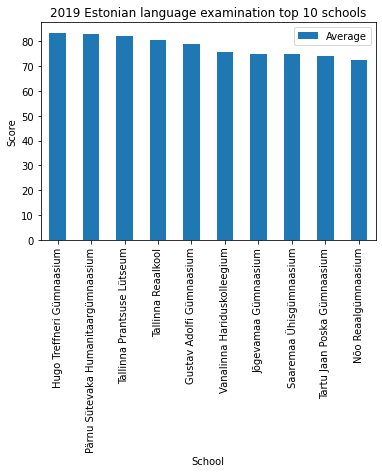

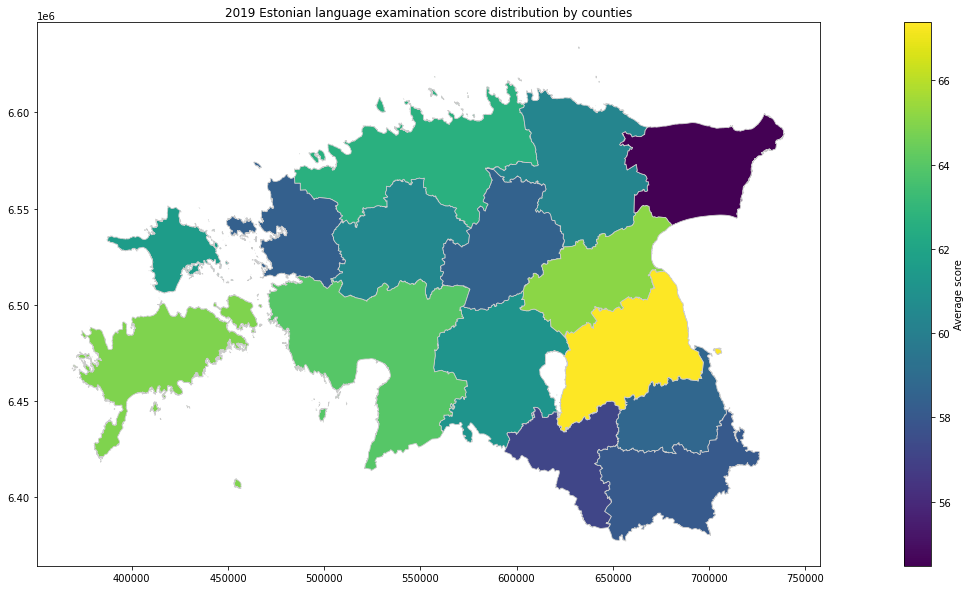

In [28]:
school = BestSchool(Est2019_Schools)
state = BestState(Est2019_States)
print(school)
print(state)

school = school.plot(x ='Õppeasutus', y='Keskmine', kind='bar')
school.set_xlabel("School")
school.set_ylabel("Score")
school.set_title("2019 Estonian language examination top 10 schools")
school.legend(["Average"]);

map(state, "2019 Estonian language examination score distribution by counties")

                             Õppeasutus   Keskmine
1                    Tallinna Reaalkool  82.362963
2            Tallinna Prantsuse Lütseum  82.046154
3             Hugo Treffneri Gümnaasium  81.065909
4              Gustav Adolfi Gümnaasium  77.947015
5                      Kehra Gümnaasium  76.000000
6                     Tallinna 21. Kool  75.965421
7              Tallinna Inglise Kolledž  75.716129
8   Pärnu Sütevaka Humanitaargümnaasium  72.580645
9                    Rocca al Mare Kool  72.219737
10          Vanalinna Hariduskolleegium  71.378761
               Maakond   Keskmine
1        Tartu maakond  65.082120
2       Jõgeva maakond  64.892742
3        Harju maakond  63.901186
4        Rapla maakond  63.037195
5        Pärnu maakond  61.621782
6         Võru maakond  61.248366
7        Saare maakond  60.922613
8   Lääne-Viru maakond  60.133858
9         Hiiu maakond  60.076923
10    Viljandi maakond  58.239357
11       Lääne maakond  57.983594
12       Põlva maakond  56.2704

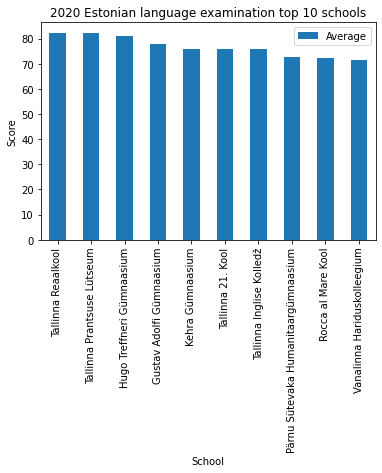

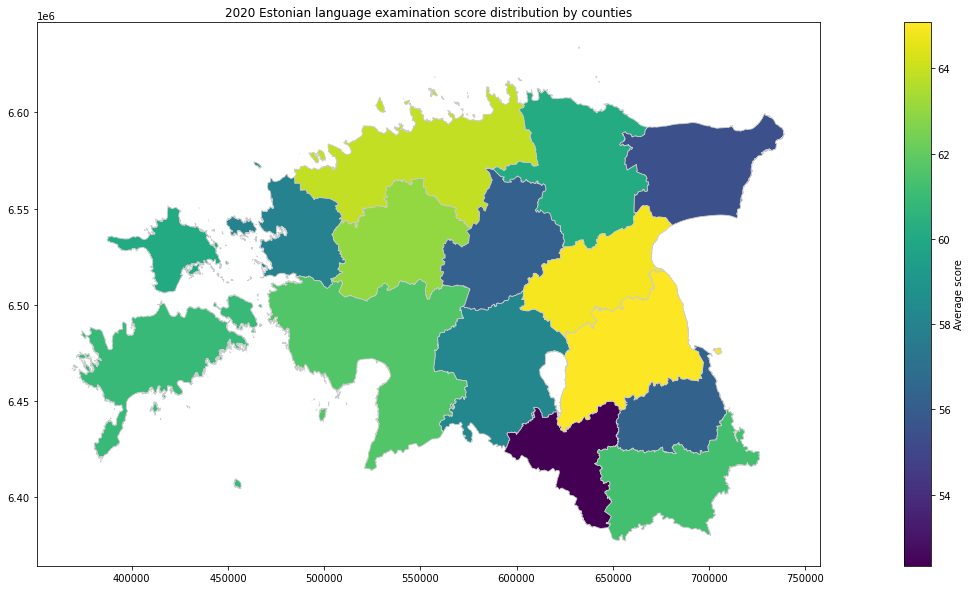

In [29]:
school = BestSchool(Est2020_Schools)
state = BestState(Est2020_States)
print(school)
print(state)

school = school.plot(x ='Õppeasutus', y='Keskmine', kind='bar')
school.set_xlabel("School")
school.set_ylabel("Score")
school.set_title("2020 Estonian language examination top 10 schools")
school.legend(["Average"]);

map(state, "2020 Estonian language examination score distribution by counties")

                             Õppeasutus   Keskmine
1                   Narva Keeltelütseum  93.150000
2    Tallinna Kesklinna Vene Gümnaasium  88.600000
3   Pärnu Sütevaka Humanitaargümnaasium  87.800000
4              Tallinna Inglise Kolledž  86.769231
5                    Tallinna Reaalkool  86.687500
6                       Saue Gümnaasium  83.300000
7            Narva Kesklinna Gümnaasium  81.700000
8              Gustav Adolfi Gümnaasium  81.685263
9           Narva Kreenholmi Gümnaasium  81.500000
10                 Sakala Eragümnaasium  80.300000
               Maakond   Keskmine
1        Tartu maakond  64.471880
2        Saare maakond  62.140230
3        Pärnu maakond  59.832110
4        Lääne maakond  57.932000
5     Viljandi maakond  57.509722
6     Ida-Viru maakond  56.521543
7       Jõgeva maakond  55.774359
8        Harju maakond  54.553616
9            Määramata  49.861250
10        Võru maakond  45.865556
11  Lääne-Viru maakond  45.662759
12       Põlva maakond  45.1847

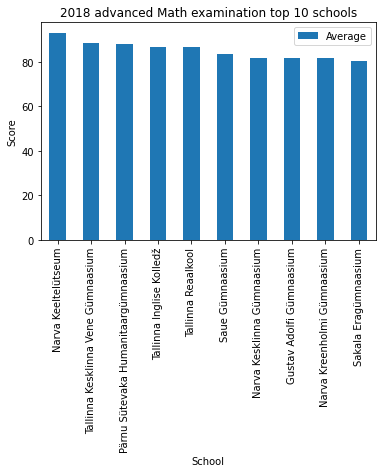

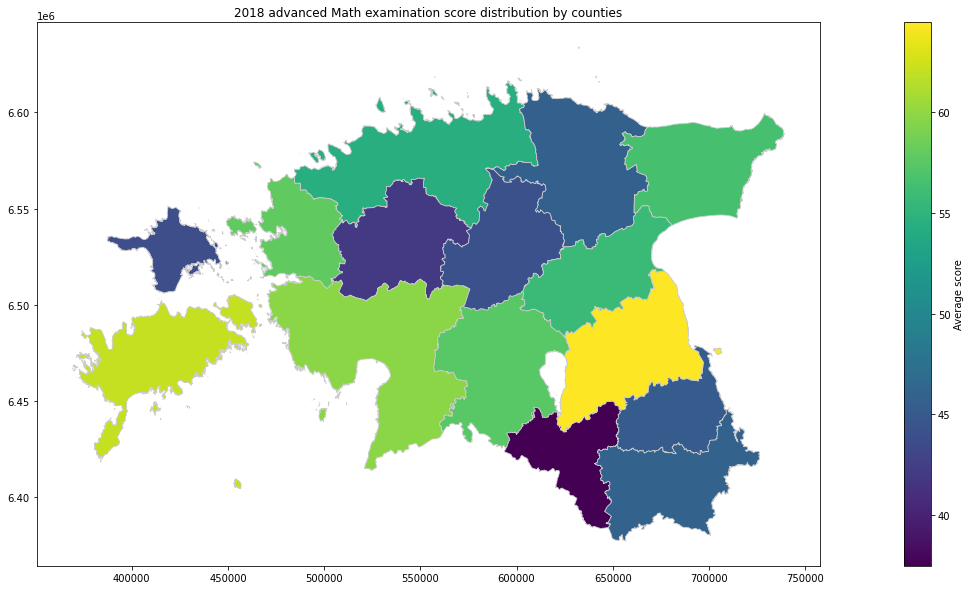

In [30]:
school = BestSchool(Math2018A_Schools)
state = BestState(Math2018A_States)
print(school)
print(state)

school = school.plot(x ='Õppeasutus', y='Keskmine', kind='bar')
school.set_xlabel("School")
school.set_ylabel("Score")
school.set_title("2018 advanced Math examination top 10 schools")
school.legend(["Average"]);

map(state, "2018 advanced Math examination score distribution by counties")

                            Õppeasutus   Keskmine
1                  Narva Keeltelütseum  86.469565
2             Tallinna Inglise Kolledž  85.800000
3                   Tallinna Reaalkool  83.322115
4            Hugo Treffneri Gümnaasium  82.513966
5             Gustav Adolfi Gümnaasium  77.123214
6                     Kuusalu Keskkool  76.769231
7                  Tallinna Juudi Kool  76.300000
8           Tallinna Prantsuse Lütseum  75.957143
9   Tallinna Kesklinna Vene Gümnaasium  75.364286
10            Vinni-Pajusti Gümnaasium  72.400000
               Maakond   Keskmine
1        Lääne maakond  65.794444
2        Saare maakond  60.507246
3        Tartu maakond  59.890190
4        Pärnu maakond  57.591818
5     Ida-Viru maakond  54.366319
6     Viljandi maakond  52.740351
7       Jõgeva maakond  51.889552
8        Harju maakond  50.980368
9         Võru maakond  47.716667
10        Hiiu maakond  45.748276
11  Lääne-Viru maakond  45.711972
12           Määramata  41.226667
13      

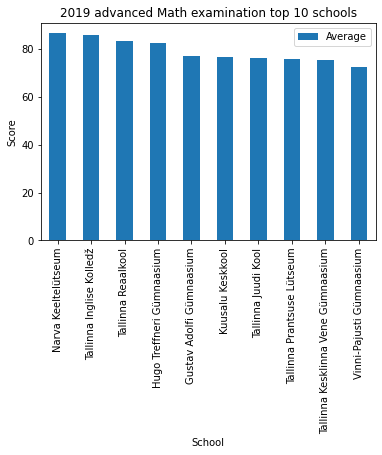

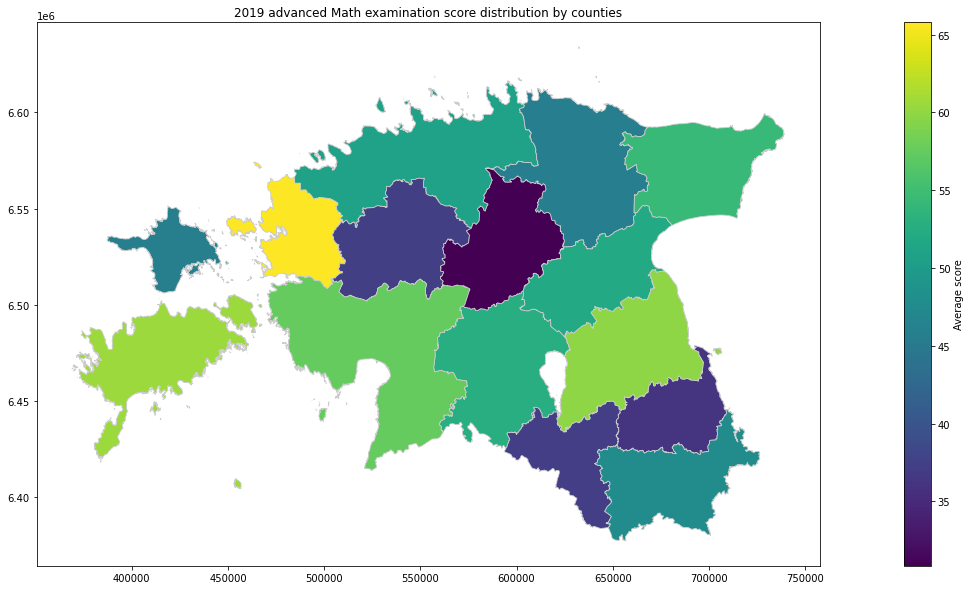

In [31]:
school = BestSchool(Math2019A_Schools)
state = BestState(Math2019A_States)
print(school)
print(state)

school = school.plot(x ='Õppeasutus', y='Keskmine', kind='bar')
school.set_xlabel("School")
school.set_ylabel("Score")
school.set_title("2019 advanced Math examination top 10 schools")
school.legend(["Average"]);

map(state, "2019 advanced Math examination score distribution by counties")

                             Õppeasutus   Keskmine
1                  Sakala Eragümnaasium  86.100000
2                    Tallinna Reaalkool  85.788889
3   Pärnu Sütevaka Humanitaargümnaasium  80.200000
4              Tallinna Inglise Kolledž  79.000000
5                   Narva Keeltelütseum  77.882353
6                        EBS Gümnaasium  77.753846
7            Tallinna Prantsuse Lütseum  75.121622
8                  Jõgevamaa Gümnaasium  74.455172
9             Hugo Treffneri Gümnaasium  72.957714
10             Gustav Adolfi Gümnaasium  72.114286
               Maakond   Keskmine
1        Pärnu maakond  59.912766
2        Tartu maakond  57.132857
3     Ida-Viru maakond  55.826792
4        Saare maakond  55.064000
5        Lääne maakond  53.922000
6       Jõgeva maakond  53.701538
7        Harju maakond  52.301434
8         Võru maakond  49.510256
9            Määramata  46.442574
10       Rapla maakond  44.359302
11  Lääne-Viru maakond  43.178448
12        Hiiu maakond  42.5333

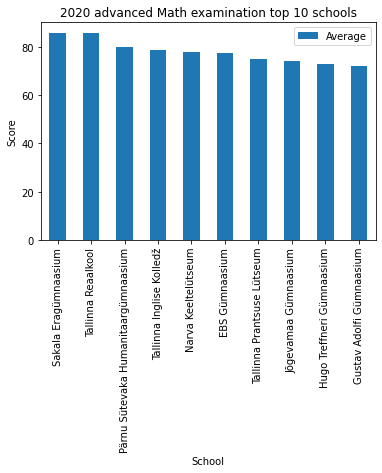

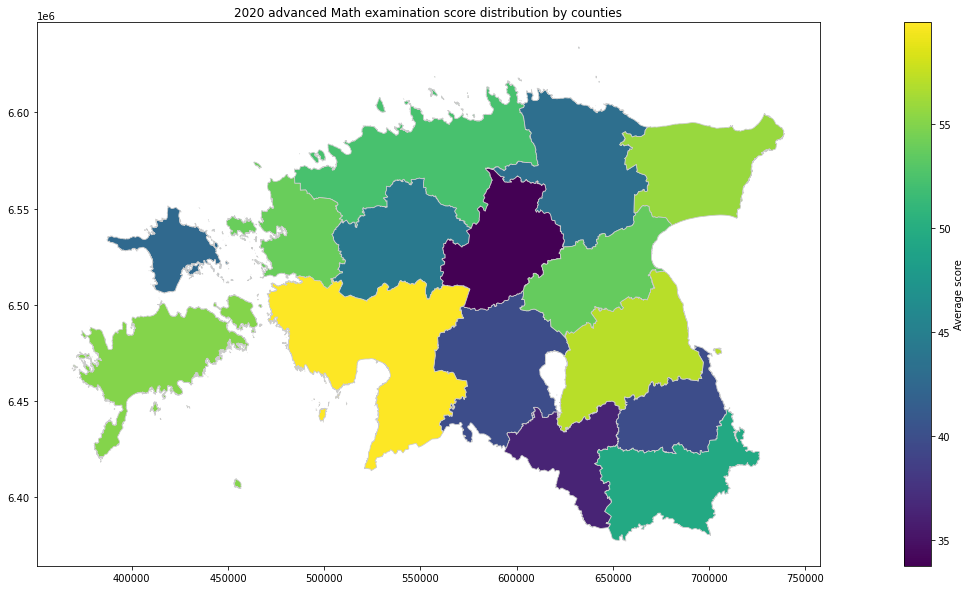

In [32]:
school = BestSchool(Math2020A_Schools)
state = BestState(Math2020A_States)
print(school)
print(state)

school = school.plot(x ='Õppeasutus', y='Keskmine', kind='bar')
school.set_xlabel("School")
school.set_ylabel("Score")
school.set_title("2020 advanced Math examination top 10 schools")
school.legend(["Average"])

map(state, "2020 advanced Math examination score distribution by counties")

                             Õppeasutus   Keskmine
1              Tallinna Inglise Kolledž  87.100000
2                  Sakala Eragümnaasium  86.400000
3                   Narva Keeltelütseum  80.400000
4                       Saue Gümnaasium  76.200000
5   Pärnu Sütevaka Humanitaargümnaasium  75.936538
6              Pärnu Koidula Gümnaasium  75.800000
7              Gustav Adolfi Gümnaasium  74.269565
8             Narva Vanalinna Riigikool  72.785714
9            Tallinna Prantsuse Lütseum  72.422727
10              Saaremaa Ühisgümnaasium  71.500000
               Maakond   Keskmine
1       Jõgeva maakond  45.885882
2        Pärnu maakond  43.016735
3        Põlva maakond  42.668000
4            Määramata  41.380000
5        Lääne maakond  40.375000
6        Saare maakond  39.818085
7     Ida-Viru maakond  38.584564
8        Harju maakond  38.022079
9        Tartu maakond  37.820985
10        Võru maakond  34.692308
11    Viljandi maakond  33.801020
12       Valga maakond  32.5181

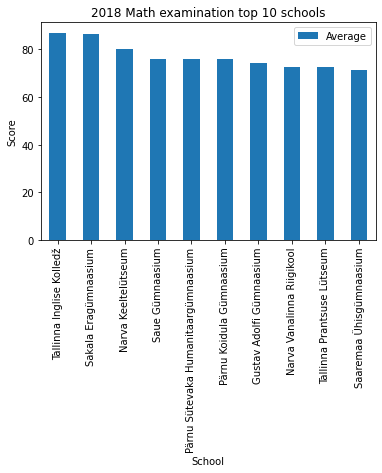

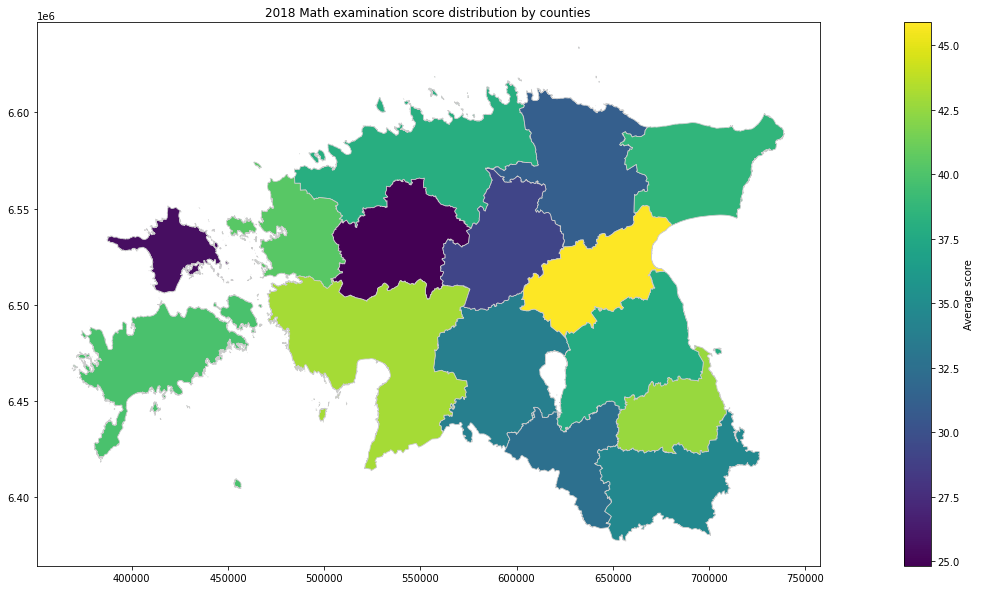

In [33]:
school = BestSchool(Math2018_Schools)
state = BestState(Math2018_States)
print(school)
print(state)

school = school.plot(x ='Õppeasutus', y='Keskmine', kind='bar')
school.set_xlabel("School")
school.set_ylabel("Score")
school.set_title("2018 Math examination top 10 schools")
school.legend(["Average"]);

map(state, "2018 Math examination score distribution by counties")

                             Õppeasutus   Keskmine
1              Tallinna Inglise Kolledž  85.600000
2                   Narva Keeltelütseum  84.572727
3              Gustav Adolfi Gümnaasium  79.503704
4   Pärnu Sütevaka Humanitaargümnaasium  77.148718
5              Pärnu Koidula Gümnaasium  71.800000
6            Tallinna Prantsuse Lütseum  71.327273
7                        EBS Gümnaasium  70.655000
8           Tartu Jaan Poska Gümnaasium  70.202000
9    Tallinna Kesklinna Vene Gümnaasium  67.805882
10        Tallinna Humanitaargümnaasium  65.276471
               Maakond   Keskmine
1        Pärnu maakond  43.909787
2        Põlva maakond  40.852632
3        Tartu maakond  40.211522
4        Saare maakond  39.344545
5       Jõgeva maakond  39.326437
6        Harju maakond  38.705235
7        Lääne maakond  38.162105
8     Ida-Viru maakond  35.832063
9            Määramata  33.352174
10       Valga maakond  33.051515
11       Järva maakond  30.324390
12  Lääne-Viru maakond  28.8201

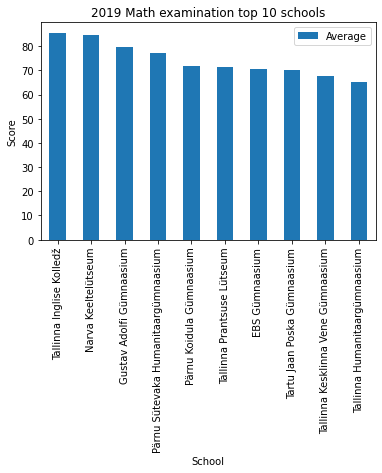

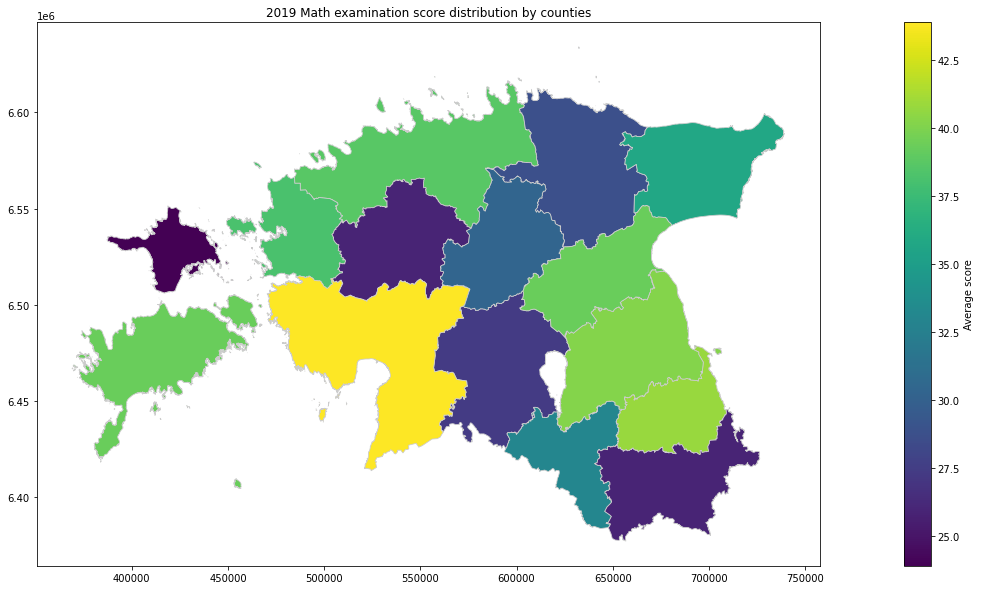

In [34]:
school = BestSchool(Math2019_Schools)
state = BestState(Math2019_States)
print(school)
print(state)

school = school.plot(x ='Õppeasutus', y='Keskmine', kind='bar')
school.set_title("2019 Math examination top 10 schools")
school.set_xlabel("School")
school.set_ylabel("Score")
school.legend(["Average"]);

map(state, "2019 Math examination score distribution by counties")

                             Õppeasutus   Keskmine
1              Tallinna Inglise Kolledž  81.066667
2                   Narva Keeltelütseum  79.385714
3   Pärnu Sütevaka Humanitaargümnaasium  73.471739
4              Gustav Adolfi Gümnaasium  73.400000
5                       Saue Gümnaasium  70.200000
6            Tallinna Prantsuse Lütseum  67.100000
7         Tallinna Humanitaargümnaasium  66.400000
8                  Sakala Eragümnaasium  64.200000
9                      Kuusalu Keskkool  64.100000
10             Pärnu Koidula Gümnaasium  62.800000
               Maakond   Keskmine
1     Ida-Viru maakond  47.463725
2        Pärnu maakond  45.605921
3       Jõgeva maakond  43.434694
4        Harju maakond  39.612809
5        Tartu maakond  38.034286
6        Põlva maakond  37.537500
7        Lääne maakond  35.768627
8            Määramata  34.166667
9        Saare maakond  33.100000
10    Viljandi maakond  30.802083
11       Rapla maakond  28.842623
12       Valga maakond  27.6340

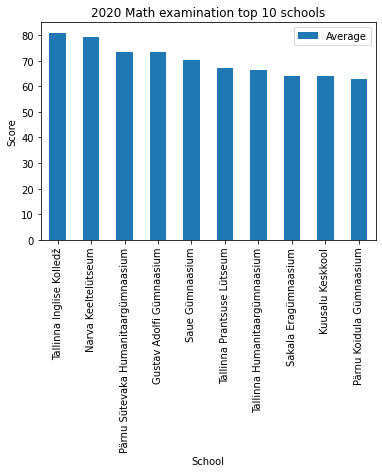

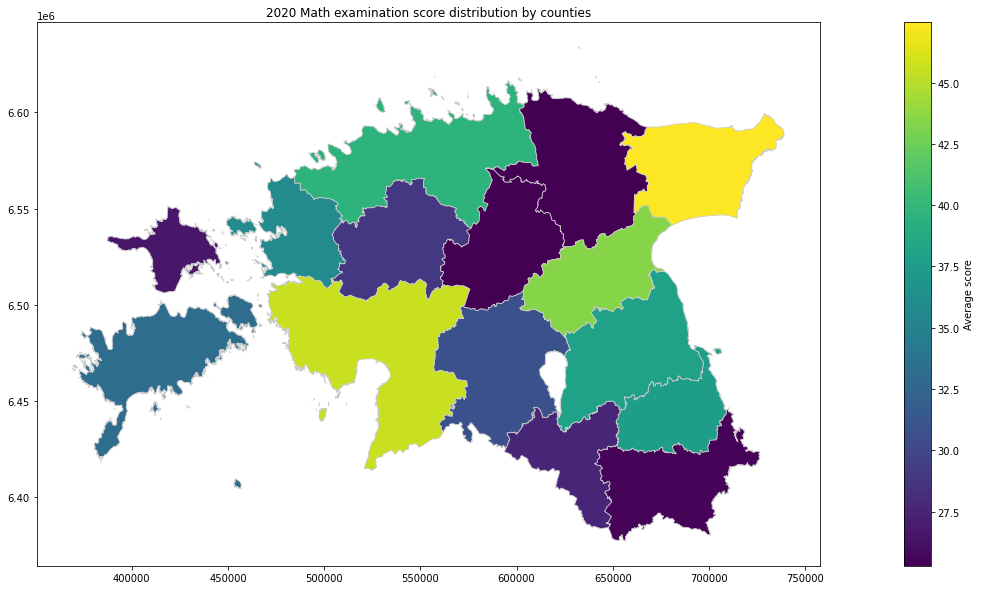

In [35]:
school = BestSchool(Math2020_Schools)
state = BestState(Math2020_States)
print(school)
print(state)

school = school.plot(x ='Õppeasutus', y='Keskmine', kind='bar')
school.set_title("2020 Math examination top 10 schools")
school.set_xlabel("School")
school.set_ylabel("Score")
school.legend(["Average"]);

map(state, "2020 Math examination score distribution by counties")

In [36]:
diffs = ["Estonian language 2018->2019:","Estonian language 2019->2020:","Math advanced exam 2018->2019:","Math advanced exam 2019->2020:","Math exam 2018->2019:","Math exam 2019->2020:"]
exams_Schools = [Est2018_Schools,Est2019_Schools,Est2020_Schools,Math2018A_Schools,Math2019A_Schools,Math2020A_Schools,Math2018_Schools,Math2019_Schools,Math2020_Schools]
counter=0
ttest_Schools = []
for i in exams_Schools:
  exam = i["Keskmine"]
  exams_Schools[counter] = exam
  counter += 1


counter=0

for i in range(6):
  ttest_Schools.append(stats.ttest_ind(exams_Schools[counter],exams_Schools[counter+1], equal_var = False))
  counter+=1
  if (counter//2 == 0):
    counter+=1


for i in range(6):
  print(diffs[i],ttest_Schools[i])



Estonian language 2018->2019: Ttest_indResult(statistic=0.6103229603265657, pvalue=0.5421340725429233)
Estonian language 2019->2020: Ttest_indResult(statistic=3.383956345694816, pvalue=0.0008568035239247875)
Math advanced exam 2018->2019: Ttest_indResult(statistic=0.9243722128138822, pvalue=0.3561753991637887)
Math advanced exam 2019->2020: Ttest_indResult(statistic=0.11631293087272972, pvalue=0.9075065820001917)
Math exam 2018->2019: Ttest_indResult(statistic=4.311554941543243, pvalue=2.3688754389630294e-05)
Math exam 2019->2020: Ttest_indResult(statistic=1.0197023137982846, pvalue=0.30871742028543664)


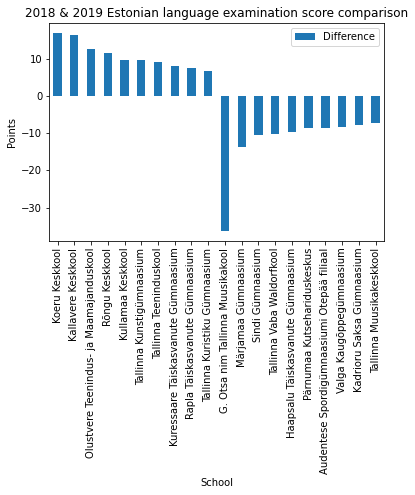

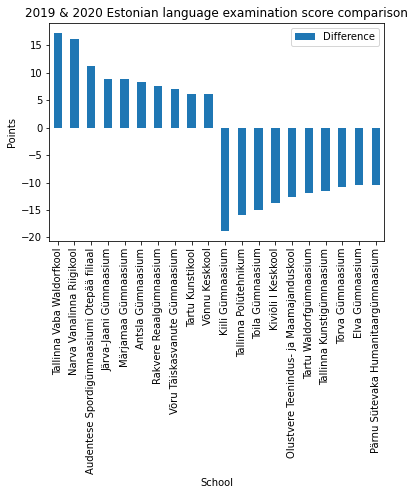

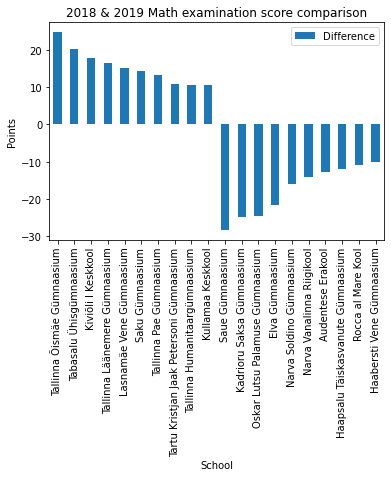

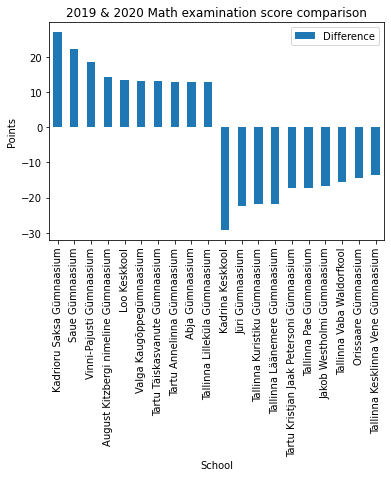

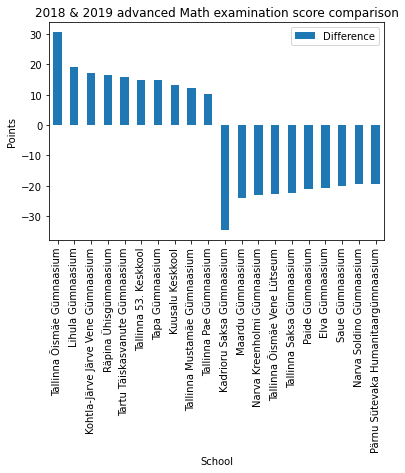

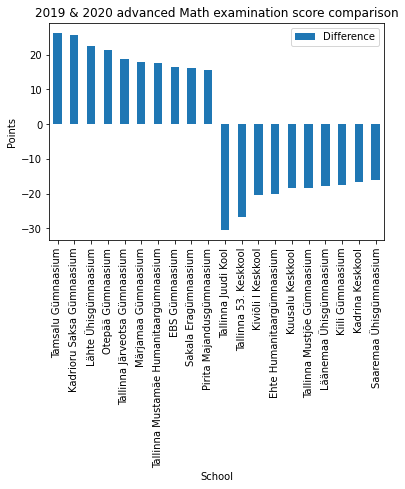

In [37]:
graaf = GraphUpsAndDowns(Est2018_Schools,Est2019_Schools)
graaf = graaf.plot(x ='Õppeasutus', y='Vahe', kind='bar')
graaf.set_title("2018 & 2019 Estonian language examination score comparison")
graaf.set_xlabel("School")
graaf.set_ylabel("Points")
graaf.legend(["Difference"])

graaf = GraphUpsAndDowns(Est2019_Schools,Est2020_Schools)
graaf = graaf.plot(x ='Õppeasutus', y='Vahe', kind='bar')
graaf.set_title("2019 & 2020 Estonian language examination score comparison")
graaf.set_xlabel("School")
graaf.set_ylabel("Points")
graaf.legend(["Difference"])

graaf = GraphUpsAndDowns(Math2018_Schools,Math2019_Schools)
graaf = graaf.plot(x ='Õppeasutus', y='Vahe', kind='bar')
graaf.set_title("2018 & 2019 Math examination score comparison")
graaf.set_xlabel("School")
graaf.set_ylabel("Points")
graaf.legend(["Difference"])

graaf = GraphUpsAndDowns(Math2019_Schools,Math2020_Schools)
graaf = graaf.plot(x ='Õppeasutus', y='Vahe', kind='bar')
graaf.set_title("2019 & 2020 Math examination score comparison")
graaf.set_xlabel("School")
graaf.set_ylabel("Points")
graaf.legend(["Difference"])

graaf = GraphUpsAndDowns(Math2018A_Schools, Math2019A_Schools)
graaf = graaf.plot(x ='Õppeasutus', y='Vahe', kind='bar')
graaf.set_title("2018 & 2019 advanced Math examination score comparison")
graaf.set_xlabel("School")
graaf.set_ylabel("Points")
graaf.legend(["Difference"])

graaf = GraphUpsAndDowns(Math2019A_Schools,Math2020A_Schools)
graaf = graaf.plot(x ='Õppeasutus', y='Vahe', kind='bar')
graaf.set_title("2019 & 2020 advanced Math examination score comparison")
graaf.set_xlabel("School")
graaf.set_ylabel("Points")
graaf.legend(["Difference"])